In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import DataAnalyzer

# Data Analyzer

In [3]:
print(DataAnalyzer.__doc__)

A data loader for Driver Monitoring System Initialize the data to be loaded.
    Args: 
        drivers: `list` or `tuple`, the registered name of meta data. 
        Loads data only for passed driver(s).

        states: `list` or `tuple`, the predefined driver's states.
        Loads data only for passed state(s).
        Reference: "Multimodal data collection system for driver emotion recognition based on self-reporting in real-world driving." Oh, Geesung, et al., 2022, Sensors.

        name: `str`, the name of the data loader.

    ```python
    from utils import DataLoader

    data_loader = DataLoader()
    ```

    Once the data loader is created, you can get the data
    with `data_loader.get_data()`.
    


## Initialize

In [15]:
drivers = [
    'GeesungOh',
    'EuiseokJeong',
    'TaesanKim',
]

states = [
    # 'Unknown',
    'Angry/Disgusting',
    'Excited/Surprised',
    'Sad/Fatigued',
    'Happy/Neutral',
]

data_analyzer = DataAnalyzer(drivers=drivers,
                         states=states,
                         name='total_data'
                         )

In [13]:
print(data_analyzer.drivers)
print(data_analyzer.states)
print(data_analyzer.name)

['GeesungOh']
[1, 2, 3, 4]
total_data


## Categorical distribution of HMI

In [6]:
print(data_analyzer.plot_HMI_count.__doc__)

plot the number of self-reported driver's states as a bat chart
        Args:
            byDriver: `bool`, default:True
                If True, plot the bat chart for each driver.

        retern:
            `DataFrame`, the count of self-reporting by state(s) and driver(s).
        


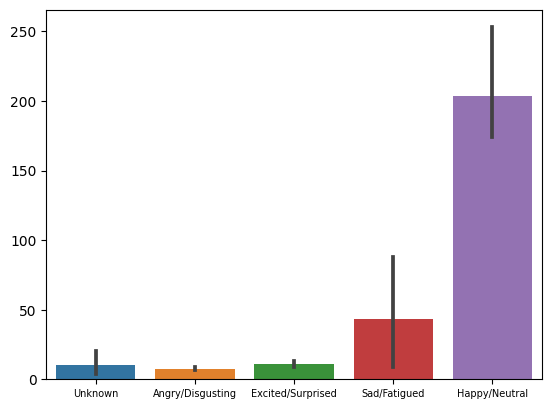

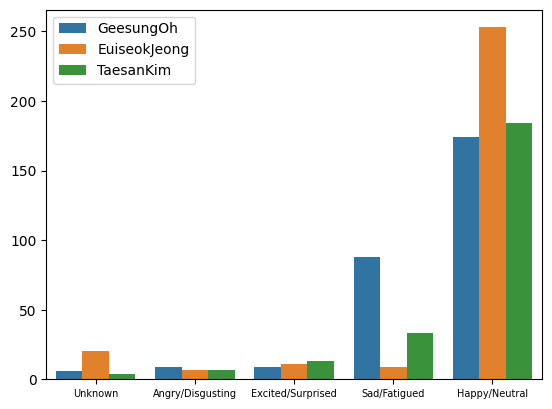

In [8]:
df_HMI_count = data_analyzer.plot_HMI_count(byDriver=False)
df_HMI_count = data_analyzer.plot_HMI_count(byDriver=True)

In [9]:
df_HMI_count

,state,driver,count
0,Unknown,GeesungOh,6
1,Unknown,EuiseokJeong,20
2,Unknown,TaesanKim,4
3,Angry/Disgusting,GeesungOh,9
4,Angry/Disgusting,EuiseokJeong,7
5,Angry/Disgusting,TaesanKim,7
6,Excited/Surprised,GeesungOh,9
7,Excited/Surprised,EuiseokJeong,11
8,Excited/Surprised,TaesanKim,13
9,Sad/Fatigued,GeesungOh,88


## Mean value distribution by each HMI

In [10]:
print(data_analyzer.plot_mean_value.__doc__)

plot the mean of mean value of a given column for a period time until each state is reported as a bat chart.
        
        Args:
            col: `str`, data feature.
            prev_sec: `integer` or `float`, time range to observe until state is self-reported.
            byDriver: `bool`, default:True
                If True, plot the bat chart for each driver.

        retern:
            `DataFrame`, the mean value of a given column by state(s) and driver(s).
        


EDA


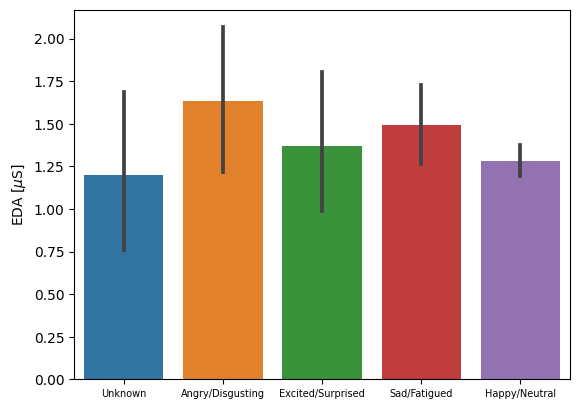

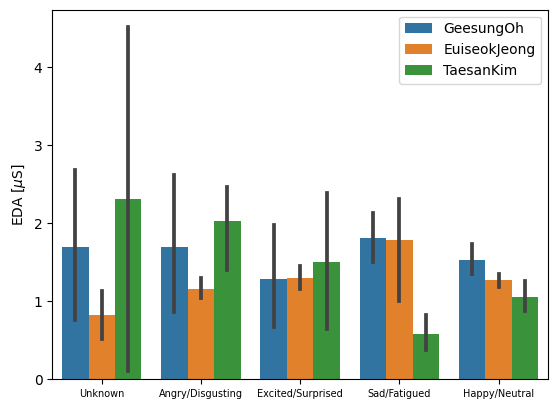

,state,driver,count,mean_value
0,Unknown,GeesungOh,6,0.194228
1,Unknown,GeesungOh,6,0.693736
2,Unknown,GeesungOh,6,0.748335
3,Unknown,GeesungOh,6,2.583218
4,Unknown,GeesungOh,6,3.418000
...,...,...,...,...
822,Happy/Neutral,TaesanKim,184,0.262146
823,Happy/Neutral,TaesanKim,184,0.265988
824,Happy/Neutral,TaesanKim,184,0.269823
825,Happy/Neutral,TaesanKim,184,0.273377


In [14]:
from config import cols_BIO

col = cols_BIO[2]
print(col)
# prev_sec = 1000
prev_sec = 100
data_analyzer.plot_mean_value(col, 
                            prev_sec=prev_sec, 
                            byDriver=False)
data_analyzer.plot_mean_value(col, 
                            prev_sec=prev_sec, 
                            byDriver=True)


WHL_SPD_FR


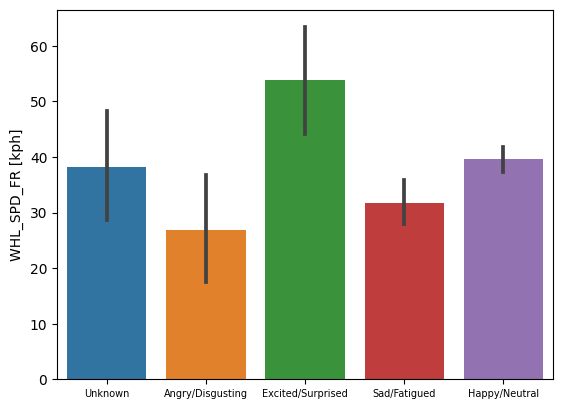

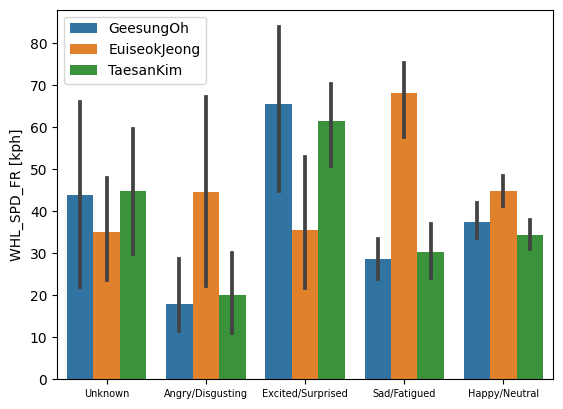

,state,driver,count,mean_value
0,Unknown,GeesungOh,6,9.994163
1,Unknown,GeesungOh,6,44.791399
2,Unknown,GeesungOh,6,78.480796
3,Unknown,GeesungOh,6,16.875928
4,Unknown,GeesungOh,6,79.829408
...,...,...,...,...
822,Happy/Neutral,TaesanKim,184,27.200788
823,Happy/Neutral,TaesanKim,184,7.850071
824,Happy/Neutral,TaesanKim,184,4.349020
825,Happy/Neutral,TaesanKim,184,6.061483


In [15]:
from config import cols_CAN_conti

col = cols_CAN_conti[5]
print(col)
prev_sec = 100

data_analyzer.plot_mean_value(col, 
                            prev_sec=prev_sec, 
                            byDriver=False)
data_analyzer.plot_mean_value(col, 
                            prev_sec=prev_sec, 
                            byDriver=True)
    

## Mean Image by each HMI

In [22]:
print(data_analyzer.show_mean_image.__doc__)

show the mean of mean image of a given column for a period time until each state is reported.
        
        Args:
            view: `str`, 'front' or 'side', position of camera installation.
            mode: `str`, 'color' or 'ir', RGB camera of IR camera.
            prev_sec: `integer` or `float`, time range to observe until state is self-reported.
            byDriver: `bool`, default:True
                If True, show the image for each driver.
            showEach: `bool`, default:False
                If True, show the image for each sample.

        retern:
            mean_img: `dictionary`, mean of mean image by state(s) and driver(s).
            image_info: `dictionary`, all the video path and frame number by state(s) and driver(s).
        


Driver:  GeesungOh
State:  Angry/Disgusting
Mean image shape:  (720, 1280, 3)


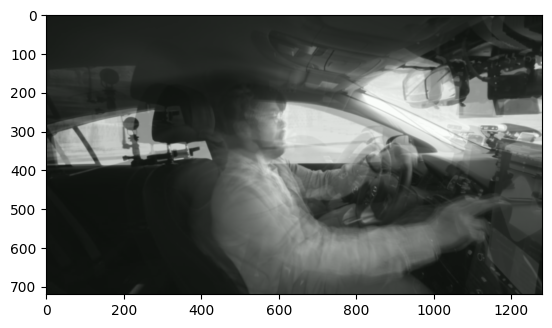

Driver:  EuiseokJeong
State:  Angry/Disgusting
Mean image shape:  (720, 1280, 3)


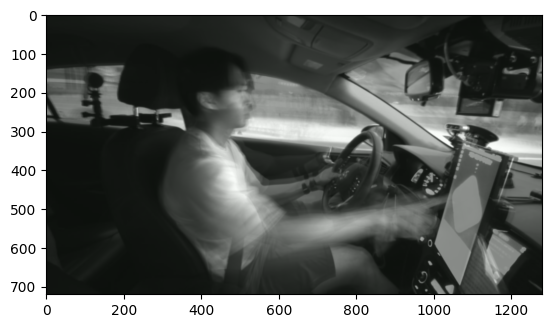

Driver:  TaesanKim
State:  Angry/Disgusting
Mean image shape:  (720, 1280, 3)


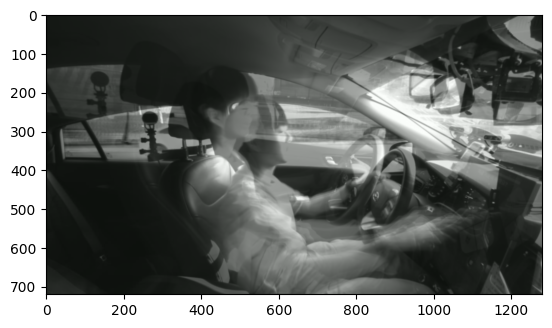

Driver:  GeesungOh
State:  Excited/Surprised
Mean image shape:  (720, 1280, 3)


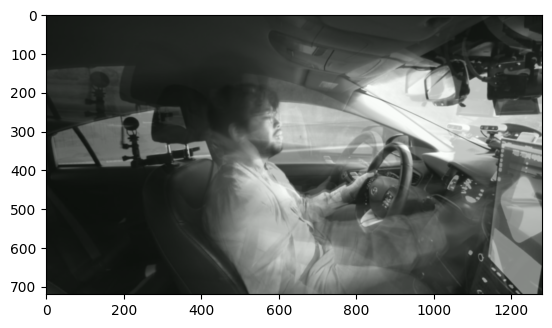

Driver:  EuiseokJeong
State:  Excited/Surprised
Mean image shape:  (720, 1280, 3)


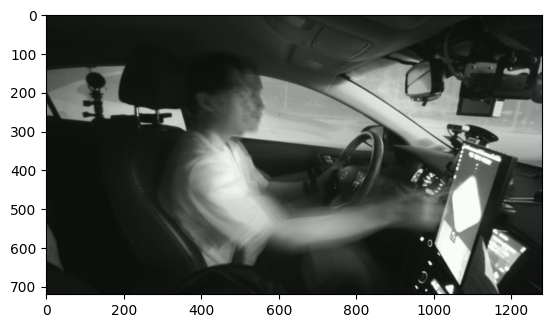

Driver:  TaesanKim
State:  Excited/Surprised
Mean image shape:  (720, 1280, 3)


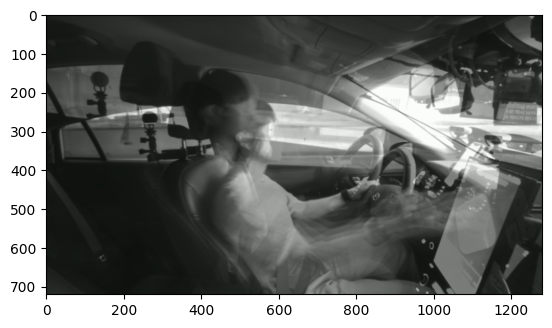

Driver:  GeesungOh
State:  Sad/Fatigued
Mean image shape:  (720, 1280, 3)


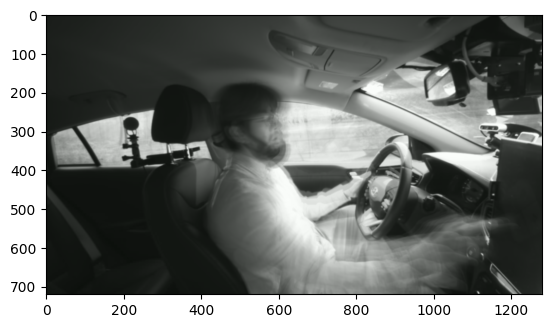

Driver:  EuiseokJeong
State:  Sad/Fatigued
Mean image shape:  (720, 1280, 3)


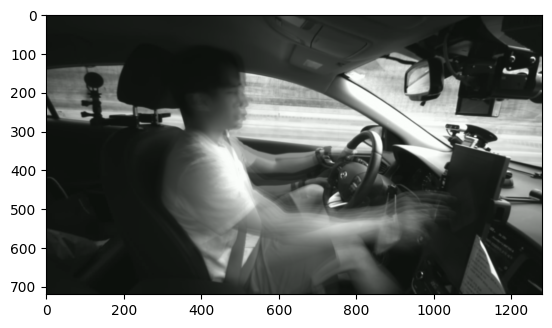

Driver:  TaesanKim
State:  Sad/Fatigued
Mean image shape:  (720, 1280, 3)


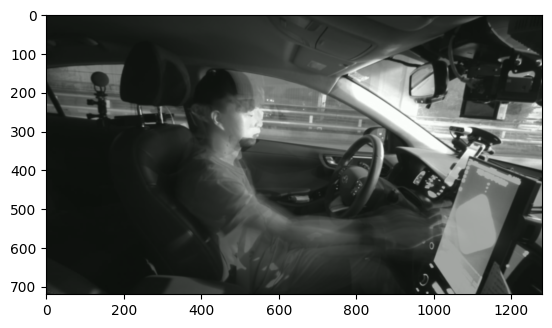

Driver:  GeesungOh
State:  Happy/Neutral
Mean image shape:  (720, 1280, 3)


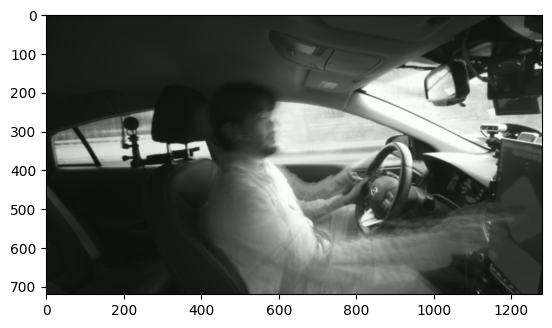

Driver:  EuiseokJeong
State:  Happy/Neutral
Mean image shape:  (720, 1280, 3)


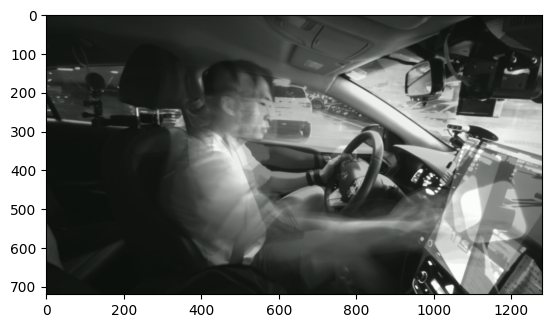

Driver:  TaesanKim
State:  Happy/Neutral
Mean image shape:  (720, 1280, 3)


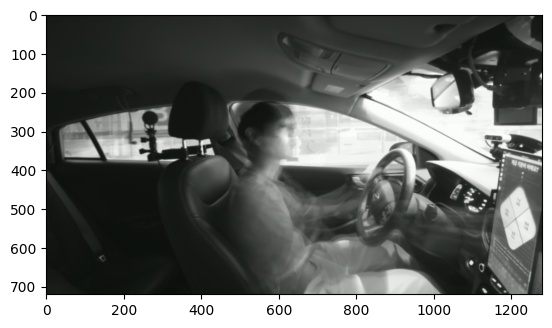

In [21]:
mean_img, show_dict = data_analyzer.show_mean_image(view='side', # front or side
                                                    mode='ir',  # color or ir
                                                    prev_sec=0.5,
                                                    byDriver=True,
                                                    )

# mean_img, show_dict = data_analyzer.show_mean_image_draft(
                                                    # byDriver=True,
                                                    # mean_img=mean_img)